<a href="https://colab.research.google.com/github/saraswathisindhu/Bharat-intern-internship/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/spam.csv",encoding='latin-1')

In [ ]:
!pip install pandas


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(df.head())

     v1  \
0  ham    
1  ham    
2  spam   
3  ham    
4  ham    

                                                                                                                                                            v2  \
0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               
1  Ok lar... Joking wif u oni...                                                                                                                                 
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3  U dun say so early hor... U c already then say...                                                                                                             
4  Nah I don't think he goes to usf, he lives around here though                                                           

In [ ]:
print(data)

        v1  \
0     ham    
1     ham    
2     spam   
3     ham    
4     ham    
...   ...    
5567  spam   
5568  ham    
5569  ham    
5570  ham    
5571  ham    

                                                                                                                                                                     v2  \
0     Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                                     
1     Ok lar... Joking wif u oni...                                                                                                                                       
2     Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's         
3     U dun say so early hor... U c already then say...                                                                                            

In [ ]:
df = df.rename(columns={'v1':'label','v2':'Text'})
df['label_enc'] = df['label'].map({'ham':0,'spam':1})
print(df.head())

  label  \
0  ham    
1  ham    
2  spam   
3  ham    
4  ham    

                                                                                                                                                          Text  \
0  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                               
1  Ok lar... Joking wif u oni...                                                                                                                                 
2  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's   
3  U dun say so early hor... U c already then say...                                                                                                             
4  Nah I don't think he goes to usf, he lives around here though                                                           

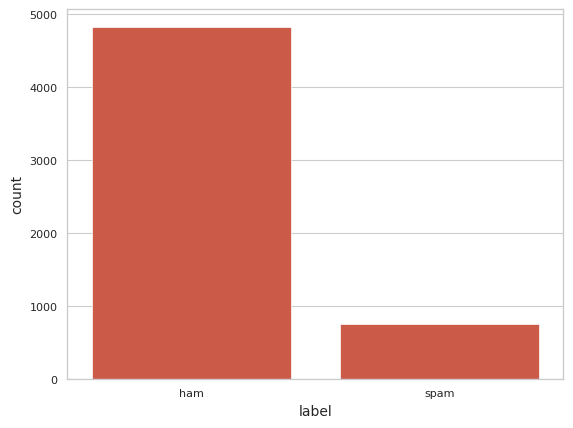

In [ ]:
sns.countplot(x=df['label'])
plt.show()


In [ ]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in df['Text']])/len(df['Text']))
print(avg_words_len)

15


In [ ]:
# Finding Total no of unique words in corpus
s = set()
for sent in df['Text']:
  for word in sent.split():
    s.add(word)
total_words_length=len(s)
print(total_words_length)

15585


In [ ]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})
X_train, X_test, y_train, y_test = train_test_split(
    new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True, force_alpha='warn')

In [ ]:
from tensorflow.keras.layers import TextVectorization

MAXTOKENS=total_words_length
OUTPUTLEN=avg_words_len

text_vec = TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)
text_vec.adapt(X_train)

In [ ]:
embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

In [ ]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_1 = keras.Model(input_layer, output_layer)

model_1.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(
    label_smoothing=0.5), metrics=['accuracy'])

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score

def compile_model(model):
    '''
    simply compile the model with adam optimzer
    '''
    model.compile(optimizer=keras.optimizers.Adam(),
                  loss=keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])

def fit_model(model, epochs, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test):
    '''
    fit the model with given epochs, train
    and test data
    '''
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        validation_data=(X_test, y_test),
                        validation_steps=int(0.2*len(X_test)))
    return history

def evaluate_model(model, X, y):
    '''
    evaluate the model and returns accuracy,
    precision, recall and f1-score
    '''
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)

    model_results_dict = {'accuracy': accuracy,
                          'precision': precision,
                          'recall': recall,
                          'f1-score': f1}

    return model_results_dict

In [ ]:
input_layer = layers.Input(shape=(1,), dtype=tf.string)
vec_layer = text_vec(input_layer)
embedding_layer_model = embedding_layer(vec_layer)
bi_lstm = layers.Bidirectional(layers.LSTM(
    64, activation='tanh', return_sequences=True))(embedding_layer_model)
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm)
dropout = layers.Dropout(.1)(flatten)
x = layers.Dense(32, activation='relu')(dropout)
output_layer = layers.Dense(1, activation='sigmoid')(x)
model_2 = keras.Model(input_layer, output_layer)

compile_model(model_2)  # compile the model
history_2 = fit_model(model_2, epochs=5)  # fit the model

Epoch 1/5
140/140 [==============================] - 38s 199ms/step - loss: 0.1722 - accuracy: 0.9381 - val_loss: 0.0819 - val_accuracy: 0.9749
Epoch 2/5
140/140 [==============================] - 13s 92ms/step - loss: 0.0289 - accuracy: 0.9928 - val_loss: 0.0832 - val_accuracy: 0.9767
Epoch 3/5
140/140 [==============================] - 13s 96ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.1051 - val_accuracy: 0.9785
Epoch 4/5
140/140 [==============================] - 18s 126ms/step - loss: 3.7807e-04 - accuracy: 1.0000 - val_loss: 0.1173 - val_accuracy: 0.9794
Epoch 5/5
140/140 [==============================] - 12s 89ms/step - loss: 5.4840e-05 - accuracy: 1.0000 - val_loss: 0.1258 - val_accuracy: 0.9785


In [ ]:
import tensorflow_hub as hub

# model with Sequential api
model_3 = keras.Sequential()

# universal-sentence-encoder layer
# directly from tfhub
use_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
						trainable=False,
						input_shape=[],
						dtype=tf.string,
						name='USE')
model_3.add(use_layer)
model_3.add(layers.Dropout(0.2))
model_3.add(layers.Dense(64, activation=keras.activations.relu))
model_3.add(layers.Dense(1, activation=keras.activations.sigmoid))

compile_model(model_3)

history_3 = fit_model(model_3, epochs=5)


Epoch 1/5
140/140 [==============================] - 6s 26ms/step - loss: 0.2861 - accuracy: 0.9186 - val_loss: 0.1116 - val_accuracy: 0.9695
Epoch 2/5
140/140 [==============================] - 3s 24ms/step - loss: 0.0786 - accuracy: 0.9776 - val_loss: 0.0707 - val_accuracy: 0.9767
Epoch 3/5
140/140 [==============================] - 4s 28ms/step - loss: 0.0557 - accuracy: 0.9829 - val_loss: 0.0569 - val_accuracy: 0.9830
Epoch 4/5
140/140 [==============================] - 5s 32ms/step - loss: 0.0453 - accuracy: 0.9863 - val_loss: 0.0513 - val_accuracy: 0.9830
Epoch 5/5
140/140 [==============================] - 3s 21ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0507 - val_accuracy: 0.9830


In [ ]:
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)
model_3_results = evaluate_model(model_3, X_test, y_test)

total_results = pd.DataFrame({'MultinomialNB Model':baseline_model_results,
                             'Custom-Vec-Embedding Model':model_1_results,
                             'Bidirectional-LSTM Model':model_2_results,
                             'USE-Transfer learning Model':model_3_results}).transpose()

print(total_results)

35/35 [==============================] - 1s 24ms/step
                             accuracy  precision    recall  f1-score
MultinomialNB Model          0.962332  1.000000   0.720000  0.837209
Custom-Vec-Embedding Model   0.238565  0.101482   0.593333  0.173320
Bidirectional-LSTM Model     0.978475  0.943662   0.893333  0.917808
USE-Transfer learning Model  0.982960  0.958042   0.913333  0.935154
